In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('superstore_sample.csv')
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [31]:
data.isna.count()  

AttributeError: 'function' object has no attribute 'count'

In [3]:
data.drop("Row_ID", axis=1, inplace=True)
data.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# task 1

In [4]:
rows=len(data.axes[0])
print(rows)

9994


In [5]:
cols=len(data.axes[1])
print(cols)

20


In [6]:
data.shape

(9994, 20)

In [7]:
data.describe().loc[['mean','std','min','max']]

,Postal_Code,Sales,Quantity,Discount,Profit
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Order_Date     9994 non-null   object 
 2   Ship_Date      9994 non-null   object 
 3   Ship_Mode      9994 non-null   object 
 4   Customer_ID    9994 non-null   object 
 5   Customer_Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal_Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product_ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub_Category   9994 non-null   object 
 15  Product_Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [9]:
data['positive'] = np.where(data['Profit']>0, True, False)
data['negative'] = np.where(data['Profit']<0, True, False)
data['none'] = np.where(data['Profit']==0, True, False)
data

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,positive,negative,none
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,True,False,False
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,True,False,False
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,True,False,False
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False,True,False
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,True,False,False
9990,CA-2017-121258,2/26/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,True,False,False
9991,CA-2017-121258,2/26/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,True,False,False
9992,CA-2017-121258,2/26/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,True,False,False


In [10]:
profit_sales=data.loc[data['positive']==True,'Profit'].count()
loss_sales=data.loc[data['negative']==True,'Profit'].count()
no_sales=data.loc[data['none']==True,'Profit'].count()
total_sales=data['Sales'].count()

In [11]:
profit_proportion=(profit_sales/total_sales)*100
profit_proportion

80.62837702621573

In [12]:
loss_proportion=(loss_sales/total_sales)*100
loss_proportion

18.721232739643785

In [13]:
none_proportion=(no_sales/total_sales)*100
none_proportion

0.6503902341404842

# task 2

In [14]:
data['sale_pre_discount']=data['Sales']/(1-data['Discount'])

In [15]:
data['discount_value']=data['Sales']*data['Discount']
data.nlargest(5, 'discount_value')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_Name,Sales,Quantity,Discount,Profit,positive,negative,none,sale_pre_discount,discount_value
2697,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,...,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,False,True,False,45276.96,11319.2400
683,US-2017-168116,11/04/2017,11/04/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,...,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,False,True,False,15999.96,3999.9900
6425,CA-2016-143714,5/23/2016,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,...,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,True,False,False,13999.96,3359.9904
165,CA-2014-139892,9/08/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,...,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,False,True,False,13599.92,3263.9808
7772,CA-2016-108196,11/25/2016,12/02/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,...,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,False,True,False,14999.95,3149.9895


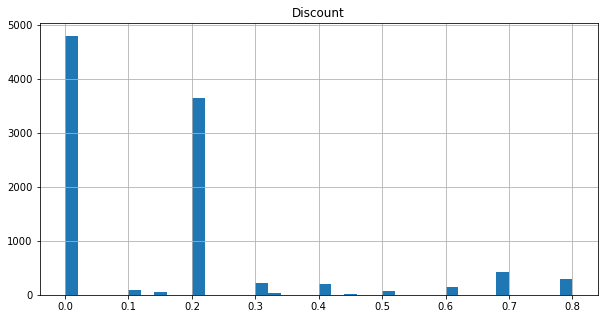

In [16]:
data.hist('Discount',bins=40 ,figsize=(10,5))
plt.show()

In [17]:
loss_df = data.loc[data['Profit']<0]

In [18]:
loss_df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_Name,Sales,Quantity,Discount,Profit,positive,negative,none,sale_pre_discount,discount_value
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False,True,False,1741.05,430.909875
14,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,False,True,False,344.05,55.048000
15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,...,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,False,True,False,12.72,2.035200
23,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,False,True,False,101.96,21.411600
27,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,...,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,False,True,False,6166.86,1541.715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,Texas,...,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176,False,True,False,111.93,17.908800
9921,CA-2014-111360,11/24/2014,11/30/2014,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,...,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936,False,True,False,19.14,4.019400
9931,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,California,...,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960,False,True,False,803.92,102.499800
9937,CA-2016-164889,6/03/2016,6/06/2016,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,California,...,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772,False,True,False,88.86,14.217600


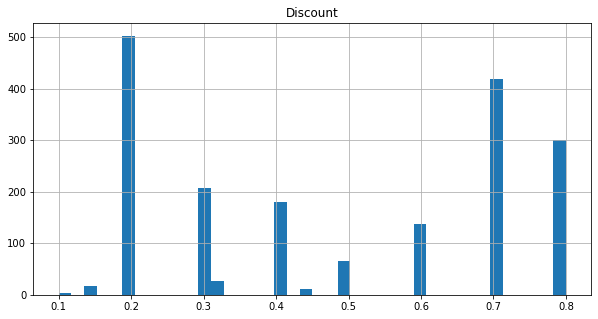

In [19]:
loss_df.hist('Discount',bins=40 ,figsize=(10,5))
plt.show()

Whenever a discount of 0.2%,0.7% and 0.8% is given then the store faced loss


# task 3

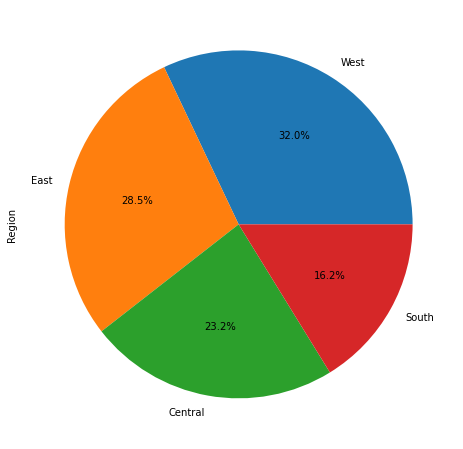

In [20]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

In [21]:
total_sales=data.groupby('Region')['Profit'].sum()
total_sales

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

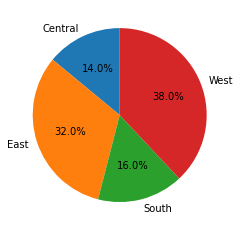

In [22]:
pie_data = (data.groupby('Region')['Profit'].sum()).to_frame()
pie_data['Percent_Profit'] = round((pie_data.Profit/sum(pie_data.Profit))*100)
plt.pie(pie_data.Percent_Profit, labels=pie_data.index,  startangle=90, autopct='%.1f%%');plt.show

The maximum profit is made from the west region followed by the east region

In [23]:
customer_sales=data.groupby("Customer_Name").Sales.sum()
customer_sales

Customer_Name
Aaron Bergman          886.156
Aaron Hawkins         1744.700
Aaron Smayling        3050.692
Adam Bellavance       7755.620
Adam Hart             3250.337
                        ...   
Xylona Preis          2374.658
Yana Sorensen         6720.444
Yoseph Carroll        5454.350
Zuschuss Carroll      8025.707
Zuschuss Donatelli    1493.944
Name: Sales, Length: 793, dtype: float64

In [24]:
customer_profit=data.groupby("Customer_Name").Profit.sum()
customer_profit=pd.DataFrame(customer_profit)
customer_profit

,Profit
Customer_Name,
Aaron Bergman,129.3465
Aaron Hawkins,365.2152
Aaron Smayling,-253.5746
Adam Bellavance,2054.5885
Adam Hart,281.1890
...,...
Xylona Preis,621.2300
Yana Sorensen,1778.2923
Yoseph Carroll,1305.6290


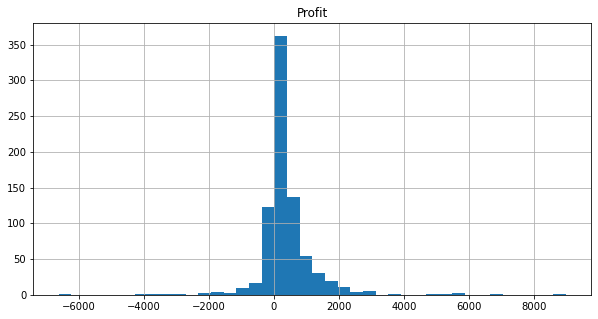

In [25]:
customer_profit.hist(bins=40 ,figsize=(10,5))
plt.show()

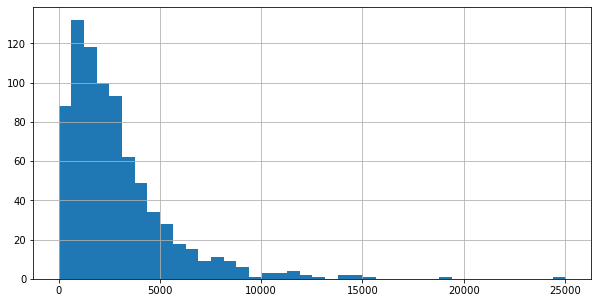

In [26]:
customer_sales.hist(bins=40 ,figsize=(10,5))
plt.show()

Customer with highest profit

In [27]:
best_customer_profit = customer_profit.sort_values(['Profit'],ascending=False).head(1)
best_customer_profit

,Profit
Customer_Name,
Tamara Chand,8981.3239


In [28]:
customer_segment=data.loc[data.Customer_Name=='Tamara Chand','Segment']
customer_segment

2072    Corporate
3185    Corporate
3186    Corporate
6825    Corporate
6826    Corporate
6827    Corporate
6828    Corporate
6829    Corporate
8060    Corporate
8061    Corporate
8337    Corporate
8338    Corporate
Name: Segment, dtype: object

In [29]:
dis=data.loc[data.Customer_Name=='Tamara Chand','discount_value']
avg_discount=dis.mean()
avg_discount

3.5049333333333337

In [30]:
customer_segment.count()

12

Tamara Chand is the best customer from the corporate segment with an average discount dollar value of 3.504 and made an order 12 times with a profit of 8981.3239

Customer with largest loss

In [31]:
best_customer_loss = customer_profit.sort_values(['Profit'],ascending=True).head(1)
best_customer_loss

,Profit
Customer_Name,
Cindy Stewart,-6626.3895


In [32]:
customer_segment=data.loc[data.Customer_Name=='Cindy Stewart','Segment']
customer_segment

1477    Consumer
1507    Consumer
2803    Consumer
2804    Consumer
6822    Consumer
7771    Consumer
7772    Consumer
7773    Consumer
9659    Consumer
Name: Segment, dtype: object

In [33]:
dis=data.loc[data.Customer_Name=='Cindy Stewart','discount_value']
avg_discount=dis.mean()
avg_discount

388.0026111111111

In [34]:
customer_segment.count()

9

Cindy Stewart is the worst customer from the consumer segment with an average discount dollar value of 388.002 and made an order 9 times with a loss of 6626.3895

# task 4

In [35]:
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])
data['Order_Date'] = pd.to_datetime(data['Order_Date']) 

data['time_to_ship'] =  (data['Ship_Date'] - data['Order_Date'] ).dt.days.astype('int16')

In [36]:
data

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,positive,negative,none,sale_pre_discount,discount_value,time_to_ship
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,True,False,False,261.96,0.000000,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,3,0.00,219.5820,True,False,False,731.94,0.000000,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,True,False,False,14.62,0.000000,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,False,True,False,1741.05,430.909875,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2,0.20,2.5164,True,False,False,27.96,4.473600,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,25.2480,3,0.20,4.1028,True,False,False,31.56,5.049600,2
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,91.9600,2,0.00,15.6332,True,False,False,91.96,0.000000,5
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,258.5760,2,0.20,19.3932,True,False,False,323.22,51.715200,5
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,29.6000,4,0.00,13.3200,True,False,False,29.60,0.000000,5


In [37]:
data['time_to_ship'].describe().loc[['mean','std','min','max']]

mean    3.958175
std     1.747567
min     0.000000
max     7.000000
Name: time_to_ship, dtype: float64

There are orders which are delivered on the same day and the maximum time to ship can be upto a week

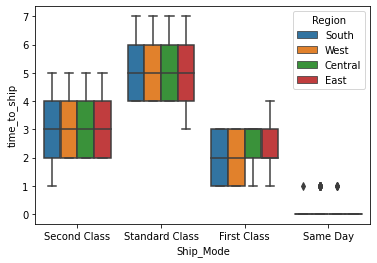

In [38]:
sns.boxplot(x="Ship_Mode", y="time_to_ship",hue='Region',data=data)
plt.show()

I may have used area chart or bar plot so it would be easy to understand lower limits and upper limits of shipping time according to shipping modes

# task 5

In [39]:
data['first_name']=data.loc[data['Customer_Name'].str.split().str.len() == 2, 'first_name'] = data['Customer_Name'].str.split().str[0]
data['first_name']

0       Claire
1       Claire
2       Darrin
3         Sean
4         Sean
         ...  
9989       Tom
9990      Dave
9991      Dave
9992      Dave
9993     Chris
Name: first_name, Length: 9994, dtype: object

In [40]:
data['first_name']. value_counts(). idxmax()

'Michael'

Michael is the most common first name

In [41]:
#longest name
data.loc[data["Customer_Name"].str.len().idxmax(), "Customer_Name"]

'Christina VanderZanden'

In [42]:
customer_purchase=data[["Customer_Name",'Order_Date']]
customer_purchase

,Customer_Name,Order_Date
0,Claire Gute,2016-11-08
1,Claire Gute,2016-11-08
2,Darrin Van Huff,2016-06-12
3,Sean O'Donnell,2015-10-11
4,Sean O'Donnell,2015-10-11
...,...,...
9989,Tom Boeckenhauer,2014-01-21
9990,Dave Brooks,2017-02-26
9991,Dave Brooks,2017-02-26
9992,Dave Brooks,2017-02-26


In [43]:
data['Order_Month']=data['Order_Date'].dt.month
data['Order_Year']=data['Order_Date'].dt.year

In [44]:

customer_list = []
months = []
years = []
new_df = pd.DataFrame()
sort_data = data.sort_values('Order_Date')

index_list = list(sort_data.index)
start_month = sort_data['Order_Date'][index_list[0]].month

customer_count = 0
month_count = 0
for i in index_list:
    
    if sort_data['Order_Date'][i].month == start_month:
        if sort_data['Customer_ID'][i] not in customer_list:
            customer_list.append(sort_data['Customer_ID'][i])
            months.append(sort_data['Order_Date'][i].month)
            years.append(sort_data['Order_Date'][i].year)
        else:
            pass
    else:
        start_month = sort_data['Order_Date'][i].month
        if sort_data['Customer_ID'][i] not in customer_list:
            customer_list.append(sort_data['Customer_ID'][i])
            months.append(sort_data['Order_Date'][i].month)
            years.append(sort_data['Order_Date'][i].year)
        else:
            pass
        

In [45]:
new_df = pd.DataFrame()
new_df['customer_ID'] = customer_list
new_df['month'] = months
new_df['year'] = years

In [46]:
df_2014=pd.DataFrame(new_df[new_df['year']==2014])
df_2015=pd.DataFrame(new_df[new_df['year']==2015])
df_2016=pd.DataFrame(new_df[new_df['year']==2016])
df_2017=pd.DataFrame(new_df[new_df['year']==2017])

In [47]:
df14=pd.DataFrame(df_2014.groupby('month')['customer_ID'].count())
df15=pd.DataFrame(df_2015.groupby('month')['customer_ID'].count())
df16=pd.DataFrame(df_2016.groupby('month')['customer_ID'].count())
df17=pd.DataFrame(df_2017.groupby('month')['customer_ID'].count())

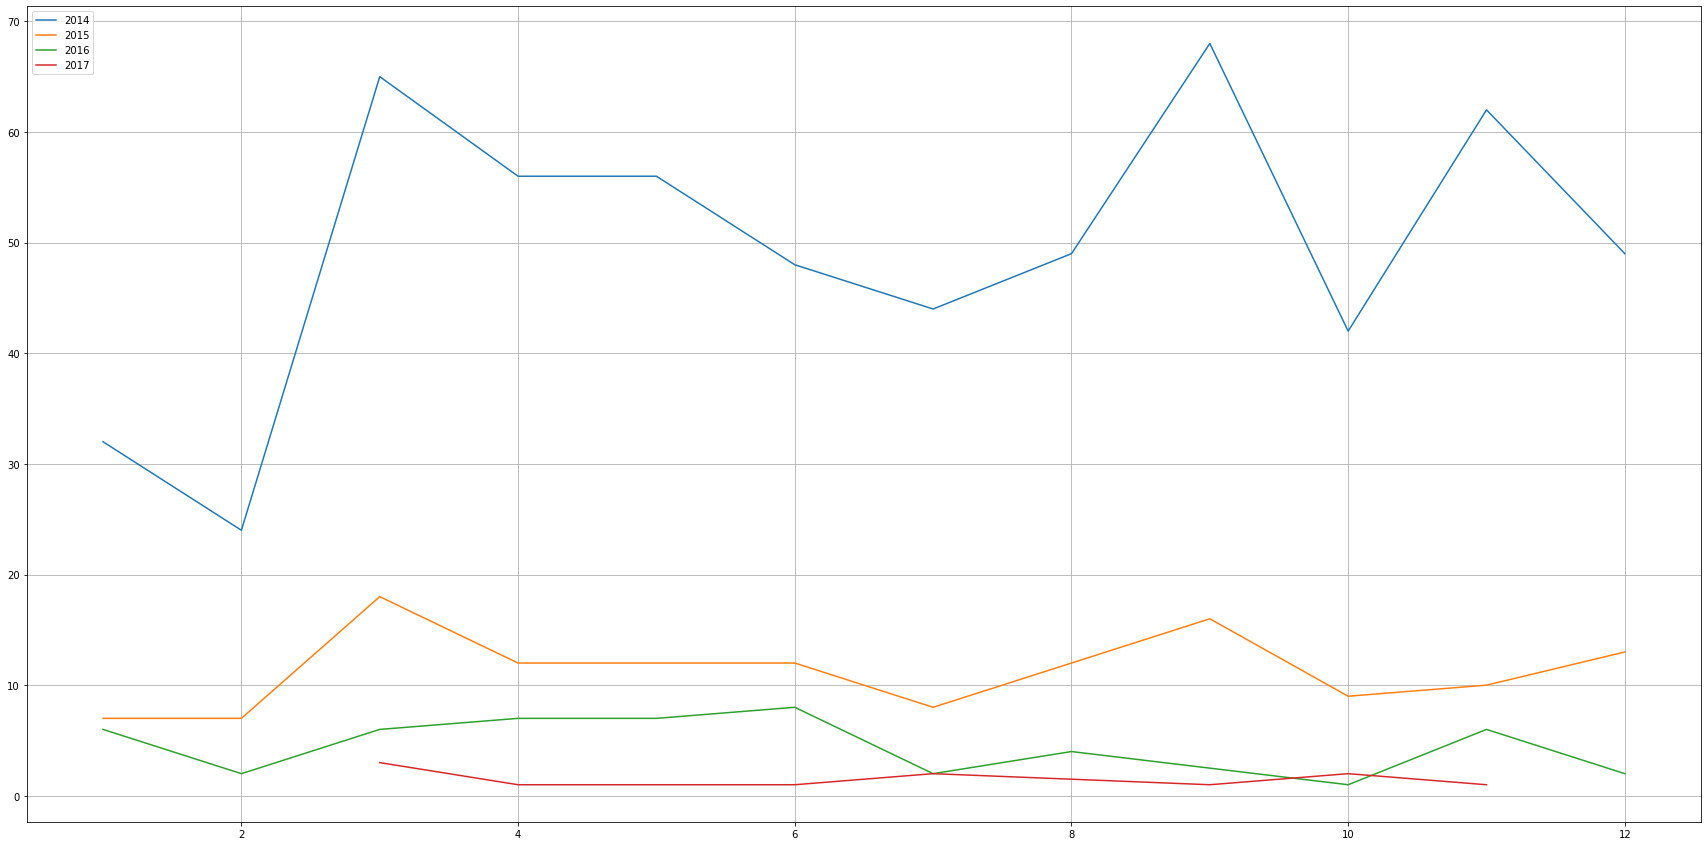

In [48]:
%matplotlib inline
plt.figure(figsize=[30,15])
plt.grid(True)
plt.plot(df14['customer_ID'],label ='2014')
plt.plot(df15['customer_ID'],label ='2015')
plt.plot(df16['customer_ID'],label ='2016')
plt.plot(df17['customer_ID'],label ='2017')
plt.legend(loc=2)

There is a decrease in the number of new customers as the year increases